In [49]:
#https://towardsdatascience.com/evolution-of-a-salesman-a-complete-genetic-algorithm-tutorial-for-python-6fe5d2b3ca35

import numpy as np
import random, operator
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
class City:
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def distance(self, city):
        xDis = abs(self.x-city.x)
        yDis = abs(self.y-city.y)
        distance = np.sqrt((xDis**2)+(yDis**2))
        return distance
    
    def __repr__(self):
        return "("+str(self.x)+","+str(self.y)+")"
    
    

In [25]:
class Fitness:
    
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness = 0.0
        
    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            for i in range(0,len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i+1 < len(self.route):
                    toCity = self.route[i+1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness        
    

In [26]:
#create the population

def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route

def initialPopulation(popSize, cityList):
    population = []
    
    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

"""Note: we only have to use these functions to create the initial population. 
Subsequent generations will be produced through breeding and mutation."""

'Note: we only have to use these functions to create the initial population. \nSubsequent generations will be produced through breeding and mutation.'

In [27]:
#Determine fitness
#simulation of survival of the fittest

def rankRoutes(population):
    
    fitnessResults = {}
    
    for i in range(0, len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

"""Next, the evolutionary fun begins. To simulate our “survival of the fittest”, 
 we can make use of Fitness to rank each individual in the population. 
 Our output will be an ordered list with the route IDs and each associated fitness score."""   

'Next, the evolutionary fun begins. To simulate our “survival of the fittest”, \n we can make use of Fitness to rank each individual in the population. \n Our output will be an ordered list with the route IDs and each associated fitness score.'

In [28]:
#Selection

#Mating pool

#For the purpose of clarity, we’ll create the mating pool in two steps. 
#First, we’ll use the output from rankRoutes to determine which routes to 
#select in our selection function. In lines 3–5, we set up the roulette 
#wheel by calculating a relative fitness weight for each individual. 
#In line 9, we compare a randomly drawn number to these weights to select 
#our mating pool. We’ll also want to hold on to our best routes, so we 
#introduce elitism in line 7. Ultimately, the selection function returns 
#a list of route IDs, which we can use to create the mating pool in the 
#matingPool function."""


In [46]:
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

In [30]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

In [31]:
#Crossover
#(Breeding)

def breed(parent1, parent2):
    child=[]
    childP1=[]
    childP2=[]

    geneA = int(random.random()*len(parent1))
    geneB = int(random.random()*len(parent2))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)
    
    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]
    
    child = childP1 + childP2
    
    return child

In [32]:
def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))
    
    for i in range(0,eliteSize):
        children.append(matingpool[i])
        
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

In [33]:
#Mutation

#Introduced in form of swaping cities

def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random()*len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    
    return individual

In [34]:
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

In [35]:
#Repeat

#Let’s pull these pieces together to create a function that produces a new generation.
#First, we rank the routes in the current generation using !!!rankRoutes!!!
#We then determine our potential parents by running the !!!selection function!!!,
#which allows us to create the mating pool using the !!!matingPool!!! function.
#Finally, we then create our new generation using the !!!breedPopulation!!! function
#and then applying mutation using the !!!mutatePopulation!!! function.

In [36]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

In [37]:
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)

    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    
    return bestRoute

In [40]:
cityList = []

for i in range(0,25):
    cityList.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))

In [42]:
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    progress = []
    progress.append(1 / rankRoutes(pop)[0][1])
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankRoutes(pop)[0][1])
    
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()

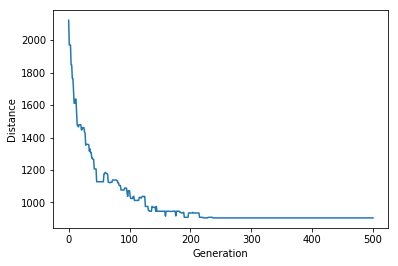

In [47]:
geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)


In [48]:
geneticAlgorithm(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)


Initial distance: 2006.9713888591293
Final distance: 921.353716166113


[(8,184),
 (9,173),
 (7,104),
 (8,99),
 (13,96),
 (30,111),
 (41,96),
 (68,74),
 (82,69),
 (82,62),
 (2,7),
 (80,33),
 (113,35),
 (135,36),
 (131,70),
 (198,89),
 (144,107),
 (140,126),
 (153,136),
 (153,136),
 (148,146),
 (191,155),
 (187,196),
 (194,182),
 (156,197)]